# DATA SCIENCE & AI (FIAP MBA) - Sabrina Otoni da Silva - 2023

## Projeto nº 3

### Professores: Dheny Fernandes (EDA: Aula 9) -- https://github.com/dhenyfernandes/5DTS, Ahirton Lopes (Machine Learning: Aula 2) -- https://github.com/ahirtonlopes/Mastering-Machine-Learning, Felipe Teodoro (Deep Learning: Aula 2 do Power Skills Extension FIAP) -- https://drive.google.com/drive/folders/14ltQ1QaGH6pjeZX3m3UNQww1BC3Qw9-1

#### Utilização dos modelos "Árvore de Decisão, Regressão Logística e MLP" para classificação e predição de sobreviventes (Classificação Binária - Aprendizagem Supervisionada).

Ref. https://www.kaggle.com/competitions/titanic

Nosso Workflow consiste em seis passos:

> Definição do problema

> Aquisição de dados de treinamento e teste

> Manipulação, preparo e limpeza dos dados

> Análise, identificação de padrão e exploração dos dados

> Modelagem, predição e resolução do problema

> Visualização e apresentação da solução final

Não é um workflow linear, visto que podemos explorar nossos dados usando visualização, ou mesmo podemos suprimir um ou outro passo ou até combinar alguns passos num só. 

## Definição do problema

A partir de um conjunto que lista se os passageiros sobreviveram ou não ao desastre do Titanic, é possível criar um modelo que determine num conjunto de teste que não possui informação de sobrevivência dos passegeiros, se estes sobreviveram ou não?

In [1]:
#Importando bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

## Aquisição de dados

A primeira coisa que vamos fazer é ler o conjunto de dados usando a função read_csv() do Pandas.

Colocaremos esses dados em um DataFrame do Pandas, chamado "titanic", e nomearemos cada uma das colunas.

In [3]:
url = 'https://raw.githubusercontent.com/ahirtonlopes/Mastering-Machine-Learning/main/Projetos/titanic.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Descrição das nossas variáveis:

> Survived - Sobreviveu? (0 = Não; 1 = Sim);
> Pclass - Classe do ticket do passageiro (1 = Primeira; 2 = Segunda; 3 = Terceira);
> Name - Nome;
> Sex - Sexo;
> Age - Idade;
> SibSp - Número de irmãos/irmãs/esposo/esposa a bordo;
> Parch - Número de pais/filhos a bordo;
> Ticket - Número do ticket;
> Fare - Custo do ticket para o passageiro (em pounds);
> Cabin - Cabine;
> Embarked - Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton);

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

### Algumas observações:

> 1) Estamos lidando tanto com features numéricas quanto com features categóricas

> 2) Existem valores faltantes

<Axes: xlabel='Survived', ylabel='count'>

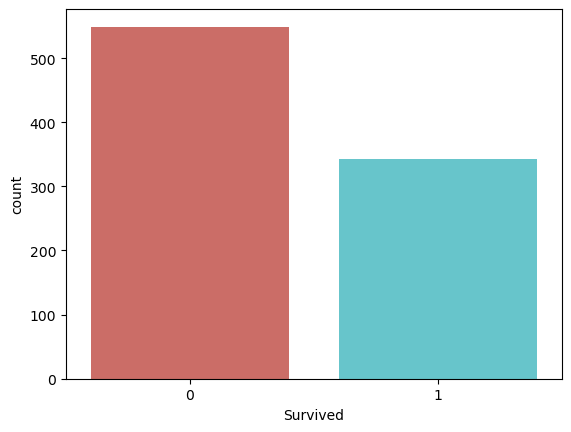

In [8]:
sb.countplot(x='Survived',data=titanic, palette='hls')

A variável Survived (nossa target) é binária.

## Validando hipóteses

> 1) A classe do passageiro(a), seu sexo, se ele(a) possui irmãos(ãs)/conjuge ou se possui pais/filhos interfere em sua sobreviência?

> 2) A faixa de idade interfere de alguma maneira na sobrevivência?

> 3) Todas as features possuem relevância ao predizer se um determinado passageiro irá sobreviver ou não?

> 4) O título de um passageiro(a) interfere em sua sobrevivência? 

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

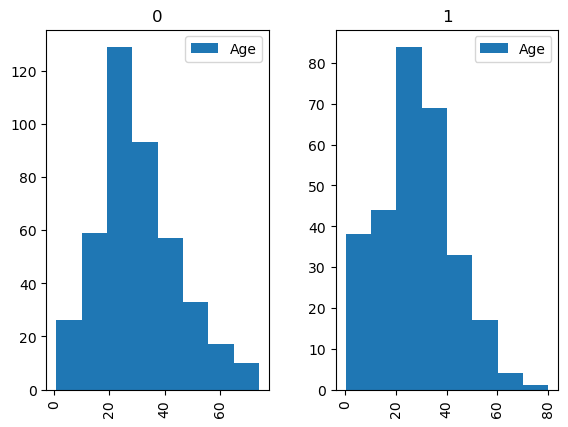

In [9]:
titanic.hist(column='Age', by='Survived', bins=8, legend=True)

Checando por valores faltantes

In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Então existem 891 linhas no dataframe. Cabin é quase todo composto por valores faltantes, então podemos eliminar essa variável completamente!

A idade parece ser um preditor relevante para a sobrevivência... entretanto possuímos 177 valores faltante. Precisamos encontrar uma maneira de nos aproximarmos desses valores em falta!

In [11]:
def proporcao(ds, attr1, attr2='Survived'):
    return ds[[attr1, attr2]].groupby([attr1], as_index=False).mean().sort_values(by=attr2, ascending=False)

Essa função retorna um dataframe que mostra a proporção dos que sobreviveram para cada valor presente no atributo1.

In [12]:
proporcao(titanic,'Parch')

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Ao analisar a coluna Name, verificamos uma série de títulos associados ao nome de um passageiro(a). Esses são os títulos presentes na coluna Name: 'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Mlle', 'Ms', 'Mme', 'Master', 'Miss', 'Mr', 'Mrs'.

Usaremos regex para extrair os títulos a partir da coluna Name e iremos inserir os valores numa nova coluna chamada Title. O Pandas.crosstab será usado para verificar quantos passageiros de cada sexo possuem cada um dos títulos.

In [13]:
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(titanic['Title'], titanic['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [14]:
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col', 
                                             'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')
titanic[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Agora utilizaremos a biblioteca "LabelEncoder" do Sklearn para transformar esses títulos em valores numéricos.

In [15]:
title_mapping = LabelEncoder()
titanic['Title'] = title_mapping.fit_transform(titanic['Title'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [16]:
proporcao(titanic, 'Title')

,Title,Survived
3,3,0.793651
1,1,0.702703
0,0,0.575000
4,4,0.347826
2,2,0.156673


# Lidando com valores faltantes

Nesse caso em particular acabamos descartando todas as variáveis que não são relevantes para a predição de sobrevivência. 

E quanto ao nome de uma pessoa, número do bilhete e número de identificação do passageiro? Eles são irrelavantes para prever a capacidade de sobrevivência. E, como você se lembra, a variável cabine é quase todo composta por valores faltantes!

In [17]:
titanic_data = titanic.drop(['PassengerId','Name','Ticket','Cabin'], 1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,2


O dataframe foi então reduzido para apenas variáveis relevantes, mas agora precisamos lidar com os valores ausentes na variável idade.

# Imputando valores faltantes

Primeiro vejamos como a idade do passageiro está relacionada à sua classe como passageiro no navio

<Axes: xlabel='Pclass', ylabel='Age'>

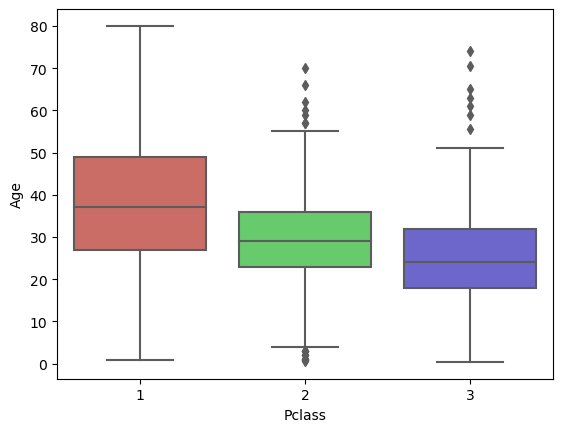

In [18]:
sb.boxplot(x='Pclass', y='Age', data=titanic_data, palette='hls')

A partir do exposto, poderíamos dizer que quanto mais jovem é um passageiro, mais provável é que ele esteja na 3ª classe e, quanto mais velho for um passageiro, maior a probabilidade de estarem na 1ª classe. Portanto, há um certo relacionamento, ainda que fraco, entre essas variáveis. 

Então, vamos escrever uma função que se aproxime da idade dos passageiros, com base em sua classe. Na análise via boxplot, parece que a idade média dos passageiros de 1ª classe é de cerca de 37 anos, já para os passageiros de 2ª classe é 29 e para os passageiros de 3ª classe são 24.

Então, vamos escrever uma função que encontre cada valor nulo na variável Idade (Age) e, para cada nulo, verifique o valor da Pclass (Classe do Passageiro) e atribua um valor de idade de acordo com a idade média dos passageiros nessa classe.

In [19]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [20]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_approx, axis=1)

In [21]:
freq_port = titanic_data.Embarked.mode()[0]
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(freq_port)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

Preenchemos as colunas Embarked com a moda e Fare com a mediana. 

In [22]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

Vamos ajustar os valores das colunas Age e Fare para valores ordinais numéricos. O código abaixo usa pd.cut para determinar as classes numéricas. O mesmo ocorre ao executar o código subsequente, mas dessa vez estamos usando pd.qcut, visto que os valores são contínuos, o que exige a classificação por quartis.

In [23]:
titanic_data['AgeBand'] = pd.cut(titanic_data['Age'], 5)
titanic_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [24]:
titanic_data['FareBand'] = pd.qcut(titanic_data['Fare'], 4)
titanic_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [25]:
titanic_data.loc[ titanic_data['Age'] <= 16, 'Age'] = 0
titanic_data.loc[(titanic_data['Age'] > 16) & (titanic_data['Age'] <= 32), 'Age'] = 1
titanic_data.loc[(titanic_data['Age'] > 32) & (titanic_data['Age'] <= 48), 'Age'] = 2
titanic_data.loc[(titanic_data['Age'] > 48) & (titanic_data['Age'] <= 64), 'Age'] = 3
titanic_data.loc[ titanic_data['Age'] > 64, 'Age'] = 4
titanic_data['Age'] = titanic_data['Age'].astype(int)

titanic_data.loc[ titanic_data['Fare'] <= 7.91, 'Fare'] = 0
titanic_data.loc[(titanic_data['Fare'] > 7.91) & (titanic_data['Fare'] <= 14.454), 'Fare'] = 1
titanic_data.loc[(titanic_data['Fare'] > 14.454) & (titanic_data['Fare'] <= 31), 'Fare']   = 2
titanic_data.loc[ titanic_data['Fare'] > 31, 'Fare'] = 3
titanic_data['Fare'] = titanic_data['Fare'].astype(int)

titanic_data = titanic_data.drop(['FareBand', 'AgeBand'], axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,1,1,0,0,S,2
1,1,1,female,2,1,0,3,C,3
2,1,3,female,1,0,0,1,S,1
3,1,1,female,2,1,0,3,S,3
4,0,3,male,2,0,0,1,S,2


In [26]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = 0
titanic_data.loc[titanic_data['FamilySize'] == True, 'IsAlone'] = 1
titanic_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [27]:
titanic_data.loc[titanic_data['FamilySize'] != True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,male,1,1,0,0,S,2,2,0
1,1,1,female,2,1,0,3,C,3,2,0
3,1,1,female,2,1,0,3,S,3,2,0
7,0,3,male,0,3,1,2,S,0,5,0
8,1,3,female,1,0,2,1,S,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...
874,1,2,female,1,1,0,2,C,3,2,0
879,1,1,female,3,0,1,3,C,3,2,0
880,1,2,female,1,0,1,2,S,3,2,0
885,0,3,female,2,0,5,2,Q,3,6,0


In [28]:
titanic_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace=True)

Criamos uma coluna para identificar se o passageiro estava ou não sozinho abordo. Utilizamos a soma das colunas SibSp e Parch (além do próprio passageiro) e colocamos em uma coluna chamada "FamilySize". Com isso, conseguimos criar uma coluna chama IsAlone, que se 0 identifica-se que não estava sozinho, e se 1, estava sozinho. Isso pode ajudar nas nossas futuras análises para descobrir se com família, a chance de ter sobrevivido foi mais baixa.

# Convertendo variáveis categóricoas em indicadores dummy

In [29]:
gender = pd.get_dummies(titanic_data['Sex'],drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [30]:
embark_location = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embark_location.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [31]:
titanic_data.drop(['Sex', 'Embarked'],axis=1,inplace=True)
titanic_data.head()

,Survived,Pclass,Age,Fare,Title,IsAlone
0,0,3,1,0,2,0
1,1,1,2,3,3,0
2,1,3,1,1,1,1
3,1,1,2,3,3,0
4,0,3,2,1,2,1


In [32]:
titanic_dmy = pd.concat([titanic_data,gender,embark_location],axis=1)
titanic_dmy.head()

,Survived,Pclass,Age,Fare,Title,IsAlone,male,Q,S
0,0,3,1,0,2,0,1,0,1
1,1,1,2,3,3,0,0,0,0
2,1,3,1,1,1,1,0,0,1
3,1,1,2,3,3,0,0,0,1
4,0,3,2,1,2,1,1,0,1


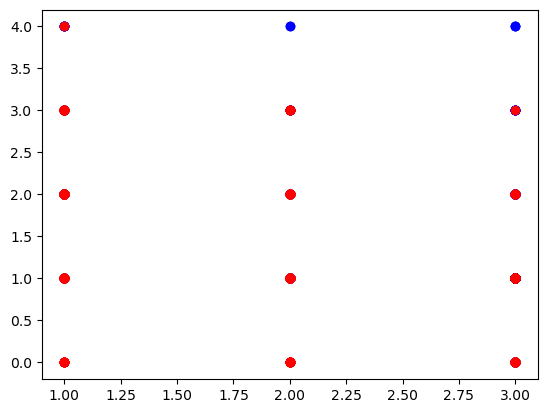

In [33]:
plt.scatter(x=titanic_dmy.loc[titanic_dmy.Survived==0, 'Pclass'],
            y=titanic_dmy.loc[titanic_dmy.Survived==0, 'Age'], c='blue')
plt.scatter(x=titanic_dmy.loc[titanic_dmy.Survived==1, 'Pclass'],
            y=titanic_dmy.loc[titanic_dmy.Survived==1, 'Age'], c='red')

# Validando a independência entre as variáveis

<Axes: >

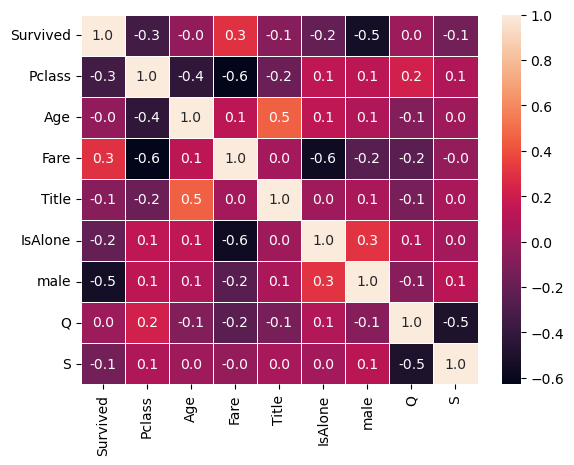

In [34]:
sb.heatmap(titanic_dmy.corr(), annot = True, fmt=".1f", linewidths=.6)

In [35]:
X = titanic_dmy[['Pclass', 'Age', 'Fare', 'Title', 'IsAlone', 'male', 'Q', 'S']]
X = sm.add_constant(X)

In [36]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [37]:
vif.iloc[1:]

,Variable,VIF
1,Pclass,2.281808
2,Age,1.566661
3,Fare,2.821311
4,Title,1.290594
5,IsAlone,1.793167
6,male,1.145943
7,Q,1.521492
8,S,1.410332


In [38]:
titanic_dmy.drop(['Fare'],axis=1,inplace=True)
titanic_dmy.head()

,Survived,Pclass,Age,Title,IsAlone,male,Q,S
0,0,3,1,2,0,1,0,1
1,1,1,2,3,0,0,0,0
2,1,3,1,1,1,0,0,1
3,1,1,2,3,0,0,0,1
4,0,3,2,2,1,1,0,1


# Agora vamos começar a criação dos nossos modelos!

1) Decision Tree

In [39]:
def evaluate_model_DT(cv):

  X = titanic_dmy.iloc[:,1:].values
  y = titanic_dmy.iloc[:,0].values

  model = DecisionTreeClassifier()

  scores = cross_val_score(model, X, y, cv=cv)

  return scores

In [40]:
for k in range(2,11):
  cv = KFold(n_splits=k, shuffle=True)
  print(f'-> folds={k}, ', evaluate_model_DT(cv))

-> folds=2,  [0.81165919 0.77303371]
-> folds=3,  [0.80808081 0.79124579 0.82154882]
-> folds=4,  [0.78923767 0.80269058 0.78923767 0.85585586]
-> folds=5,  [0.78212291 0.7752809  0.8258427  0.81460674 0.8258427 ]
-> folds=6,  [0.79865772 0.79865772 0.84563758 0.77702703 0.85135135 0.73648649]
-> folds=7,  [0.796875   0.8203125  0.77165354 0.77165354 0.77952756 0.81889764
 0.85826772]
-> folds=8,  [0.77678571 0.75892857 0.8125     0.79279279 0.82882883 0.79279279
 0.81081081 0.79279279]
-> folds=9,  [0.81818182 0.78787879 0.78787879 0.76767677 0.78787879 0.75757576
 0.78787879 0.84848485 0.82828283]
-> folds=10,  [0.76666667 0.78651685 0.85393258 0.76404494 0.82022472 0.80898876
 0.76404494 0.84269663 0.85393258 0.74157303]


In [41]:
cv_prediction_DT = cross_val_predict(DecisionTreeClassifier(), titanic_dmy.iloc[:,1:].values, titanic_dmy.iloc[:,0].values, cv=10)

In [42]:
print(accuracy_score(titanic_dmy.iloc[:,0].values, cv_prediction_DT))

0.7991021324354658


In [43]:
confusion_matrix_DT = confusion_matrix(titanic_dmy.iloc[:,0].values, cv_prediction_DT)
confusion_matrix_DT

array([[503,  46],
       [133, 209]], dtype=int64)

In [44]:
print(classification_report(titanic_dmy.iloc[:,0].values, cv_prediction_DT))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       549
           1       0.82      0.61      0.70       342

    accuracy                           0.80       891
   macro avg       0.81      0.76      0.77       891
weighted avg       0.80      0.80      0.79       891



2) Logistic Regression

In [45]:
def evaluate_model_LR(cv):

  X = titanic_dmy.iloc[:,1:].values
  y = titanic_dmy.iloc[:,0].values

  model = LogisticRegression()

  scores = cross_val_score(model, X, y, cv=cv)

  return scores

In [46]:
for k in range(2,11):
  cv = KFold(n_splits=k, shuffle=True)
  print(f'-> folds={k}, ', evaluate_model_LR(cv))

-> folds=2,  [0.79147982 0.78876404]
-> folds=3,  [0.71043771 0.81481481 0.82491582]
-> folds=4,  [0.78026906 0.78026906 0.79820628 0.79279279]
-> folds=5,  [0.77653631 0.76966292 0.74719101 0.84831461 0.80898876]
-> folds=6,  [0.80536913 0.79194631 0.72483221 0.78378378 0.81756757 0.77702703]
-> folds=7,  [0.7734375  0.8125     0.78740157 0.74015748 0.78740157 0.80314961
 0.78740157]
-> folds=8,  [0.77678571 0.85714286 0.78571429 0.82882883 0.76576577 0.71171171
 0.76576577 0.78378378]
-> folds=9,  [0.76767677 0.74747475 0.75757576 0.78787879 0.81818182 0.75757576
 0.75757576 0.87878788 0.80808081]
-> folds=10,  [0.72222222 0.78651685 0.79775281 0.76404494 0.79775281 0.80898876
 0.85393258 0.74157303 0.80898876 0.80898876]


In [47]:
cv_prediction_LR = cross_val_predict(LogisticRegression(), titanic_dmy.iloc[:,1:].values, titanic_dmy.iloc[:,0].values, cv=10)

In [48]:
print(accuracy_score(titanic_dmy.iloc[:,0].values, cv_prediction_LR))

0.7890011223344556


In [49]:
confusion_matrix_LR = confusion_matrix(titanic_dmy.iloc[:,0].values, cv_prediction_LR)
confusion_matrix_LR

array([[463,  86],
       [102, 240]], dtype=int64)

In [50]:
print(classification_report(titanic_dmy.iloc[:,0].values, cv_prediction_LR))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       549
           1       0.74      0.70      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891



3) MLP

In [51]:
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

In [52]:
def evaluate_model_MLP(cv):

  X = titanic_dmy.iloc[:,1:].values
  y = titanic_dmy.iloc[:,0].values

  model = MLPClassifier()

  scores = cross_val_score(model, X, y, cv=cv)

  return scores

In [53]:
for k in range(2,11):
  cv = KFold(n_splits=k, shuffle=True)
  print(f'-> folds={k}, ', evaluate_model_MLP(cv))

-> folds=2,  [0.81165919 0.80898876]
-> folds=3,  [0.8047138  0.78451178 0.82154882]
-> folds=4,  [0.80269058 0.82511211 0.8206278  0.77477477]
-> folds=5,  [0.78212291 0.80898876 0.8258427  0.82022472 0.84269663]
-> folds=6,  [0.81208054 0.77181208 0.80536913 0.78378378 0.84459459 0.7972973 ]
-> folds=7,  [0.8515625  0.7734375  0.86614173 0.81889764 0.79527559 0.77952756
 0.78740157]
-> folds=8,  [0.86607143 0.76785714 0.77678571 0.79279279 0.85585586 0.81081081
 0.76576577 0.77477477]
-> folds=9,  [0.78787879 0.80808081 0.77777778 0.7979798  0.83838384 0.83838384
 0.76767677 0.74747475 0.88888889]
-> folds=10,  [0.78888889 0.76404494 0.76404494 0.78651685 0.8988764  0.83146067
 0.74157303 0.79775281 0.79775281 0.79775281]


In [54]:
cv_prediction_MLP = cross_val_predict(MLPClassifier(), titanic_dmy.iloc[:,1:].values, titanic_dmy.iloc[:,0].values, cv=10)

In [55]:
print(accuracy_score(titanic_dmy.iloc[:,0].values, cv_prediction_MLP))

0.8125701459034792


In [56]:
confusion_matrix_MLP = confusion_matrix(titanic_dmy.iloc[:,0].values, cv_prediction_MLP)
confusion_matrix_MLP

array([[485,  64],
       [103, 239]], dtype=int64)

In [57]:
print(classification_report(titanic_dmy.iloc[:,0].values, cv_prediction_MLP))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       549
           1       0.79      0.70      0.74       342

    accuracy                           0.81       891
   macro avg       0.81      0.79      0.80       891
weighted avg       0.81      0.81      0.81       891

